##Problema 02

Fazer a análise do dataset do Titanic. Limpeza, Preparação e Análise Exploratória dos Dados(não é necessário fazer previsões (modelos), basta analisar e organizar o dataset) usando Jupyter Notebook.

##Comentários
**Descrição do dataset**<br>
PassengerId	= A unique ID to each Passenger; 1-891<br>
Survived	  = A boolean variable; 1 - Survived, 0 - Dead <br>
Pclass	    = Ticket Class; 1 - 1st, 2 - 2nd, 3 - 3rd class <br>
Name	      = Passenger Name <br>
Sex	        = Sex of Passenger <br>
Age	        = Age in Years <br>
SibSp	      = Number of Siblings / Spouses Aboard <br>
Parch	      = Number of parents / children aboard the titanic <br>
Ticket	    = Ticket number <br>
Fare	      = Passenger Fare <br>
Cabin	      = Cabin number <br>
Embarked	  = Port of Embarkation; C - Cherbourg, Q - Queenstown, S - Southampton <br><br>

**Considerações sobre as variáveis** <br>
Pclass <br>
1st = Superior
2nd = Meio
3rd = Inferior

SibSp <br>
Sibling = irmão, irmã <br>
Spouse = marido, esposa <br>

Parch <br>
Parent = pai, mãe <br>
Child = filhos <br>
Algumas criaças viajaram sozinhas com babá, neste caso parch=0 

#Carregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importando o arquivo localmente
file_path = "titanic-data.csv"
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# limpando a base de dados, retirando com colunas com mais de 50% de NaN e depoins linhas com NaN

half = len(df) / 2
df = df.dropna(thresh=half ,axis=1)
df = df.dropna()

df.isnull().sum()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [10]:
# Análise exploratória

df.nunique()

df['last_name'] = df['Name'].str.extract(r'(?P<First_Name>\w+)', expand = True)

feat_sample = len(df)
feat_local = str(df['Embarked'].mode().iloc[0])
ports = {'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}
feat_local = ports.get(feat_local)
feat_pctm = round(len(df[df['Sex'] == 'female'])/len(df), 2)
feat_pcth = round(len(df[df['Sex'] == 'male'])/len(df), 2)
feat_name = str(df['last_name'].mode().iloc[0])
feat_age = round(df['Age'].mean(),2)
feat_fare = round(df['Fare'].mean(),2)

print('Percentual de Mulheres na Amostra:', feat_pctm, '\nPercentual de Homens:', feat_pcth,
'\nLocal de Embarque mais comum:', feat_local, '\nSobrenome mais comum:', feat_name, '\nIdade Média dos Passageiros:', feat_age,
 '\nMédia de Preço da Passagem (GBP):', feat_fare)

Percentual de Mulheres na Amostra: 0.36 
Percentual de Homens: 0.64 
Local de Embarque mais comum: Southampton 
Sobrenome mais comum: Andersson 
Idade Média dos Passageiros: 29.64 
Média de Preço da Passagem (GBP): 34.57


(-1.1023449871553506,
 1.1001116660550168,
 -1.101503720049263,
 1.1061312914563115)

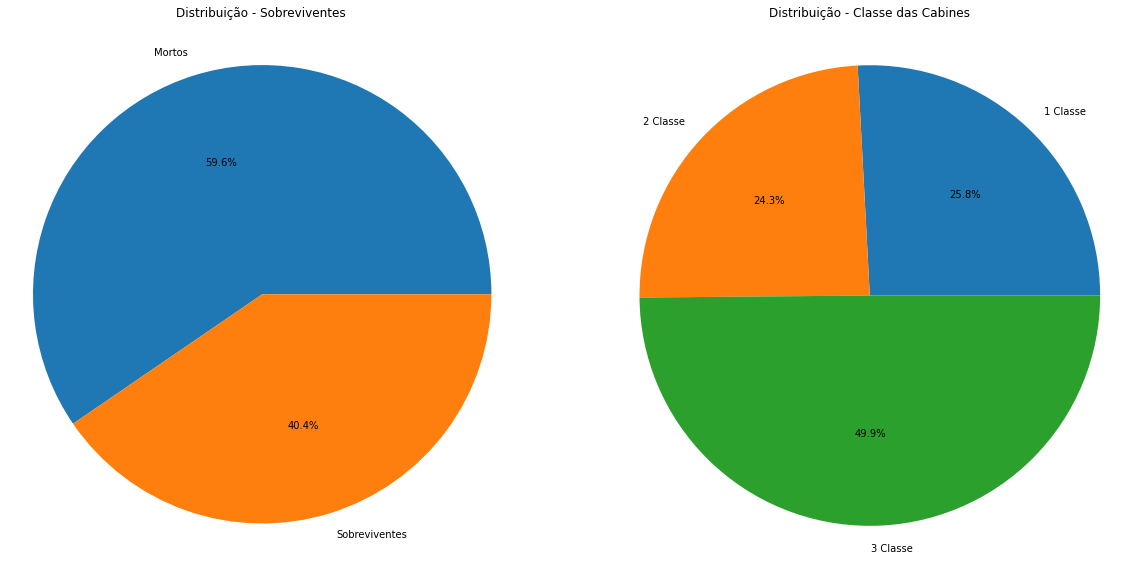

In [18]:
# Visualização de dados

fig, axs = plt.subplots(1, 2, figsize = (20,10))

pizza_grupos = df.groupby('Survived').size()
axs[0].pie(pizza_grupos, labels = ['Mortos','Sobreviventes'], autopct='%1.1f%%')
axs[0].set_ylabel('')
axs[0].set_title('Distribuição - Sobreviventes')
axs[0].axis('equal')

pizza_grupos2 = df.groupby('Pclass').size()
axs[1].pie(pizza_grupos2, labels = ['1 Classe','2 Classe', '3 Classe'], autopct='%1.1f%%')
axs[1].set_ylabel('')
axs[1].set_title('Distribuição - Classe das Cabines')
axs[1].axis('equal')
